<a href="https://colab.research.google.com/github/stellahmnene/Phase3_project/blob/main/SyriaTelChurn_Stella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom Churn Analysis and Customer Retention Strategies**

Author: Stellah Mishi

**Overview**

Customer churn is a critical issue for telecom companies, as losing customers leads to significant revenue loss and increased acquisition costs. This project aims to leverage machine learning to predict customer churn and provide actionable insights to improve customer retention strategies.

**Business Problem**

Telecom companies face the challenge of customer attrition, where customers discontinue their services for various reasons, including pricing, service quality, and competition. Understanding the key drivers of churn and predicting which customers are likely to leave can help businesses take proactive measures to enhance customer satisfaction and retention.

**Objectives**

-To develop a classification model that accurately predicts customer churn.

-To identify the most influential factors contributing to churn.

-To provide data-driven recommendations to reduce churn and improve customer loyalty.

## **Business Questions**
### **General Business Questions:**
-What are the key factors driving customer churn in the telecom industry?

W-hat customer segments are at the highest risk of churning?

-What strategic actions can telecom companies take to reduce churn based on model insights?

### **Modeling-Specific Business Questions:**
-What classification model performs best in predicting customer churn?

-What are the most important features influencing the model’s predictions?

-How do different machine learning techniques (Logistic Regression, Decision Trees, etc.) compare in terms of accuracy, recall, and precision?

-How well does our model generalize to unseen data?

-What is the impact of hyperparameter tuning on model performance?

-What threshold should be used for classification to balance false positives and false negatives?

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Download dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("becksddf/churn-in-telecoms-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/becksddf/churn-in-telecoms-dataset/versions/1


In [ ]:
#To display dataset
# Assuming the dataset is a CSV file named 'telecom_churn.csv'

import os
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        filepath = os.path.join(path, filename)
        try:
            df = pd.read_csv(filepath)
            print(df.head()) # Display the first few rows of the DataFrame
            break  # Stop after the first CSV file is found
        except pd.errors.ParserError:
            print(f"Could not parse {filename} as a CSV file.")
        except Exception as e:
            print(f"An error occurred while reading {filename}: {e}")
else:
    print("No CSV files found in the downloaded dataset.")

  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...           

## Data Exploraition

In [ ]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [ ]:
# Get summary statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
#Checking for null values
df.isnull().sum()

,0
state,0
account length,0
area code,0
phone number,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0


In [ ]:
# To have an overview of all the columns in the data frame
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [ ]:
#To check if there are any duplicated columns
df.T.duplicated().any()


False

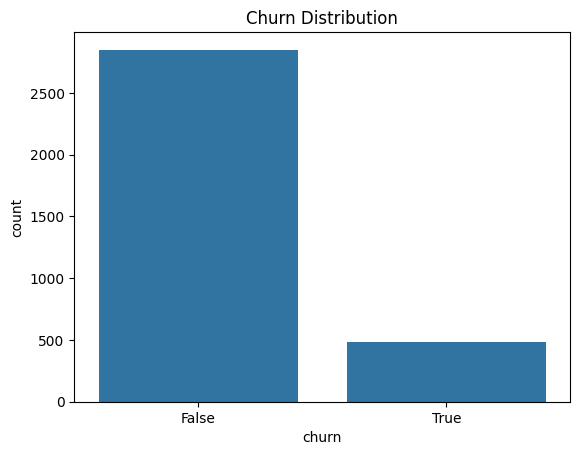

,proportion
churn,
False,85.508551
True,14.491449


In [ ]:
#Check distribution of target variable
import seaborn as sns
import matplotlib.pyplot as plt
churn_column = 'churn'
sns.countplot(x=churn_column, data=df)
plt.title("Churn Distribution")
plt.show()

# Show class distribution as percentages
df[churn_column].value_counts(normalize=True) * 100

## Data Cleaning

In [ ]:
#Dropping irrelevant columns
df.drop(columns=['customerID'], inplace=True, errors='ignore')
print(df.columns)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [ ]:
#Handling missing values
#Handling missing values
# Select only numeric columns to calculate the mean
numeric_df = df.select_dtypes(include=[np.number])

# Fill missing values in numeric columns with their respective means
df[numeric_df.columns] = numeric_df.fillna(numeric_df.mean())
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [ ]:
# Filling missing categorical columns with their mode
df.fillna(df.mode().iloc[0], inplace=True)
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [ ]:
# Convert Categorical Variables to Numeric
#Convert Churn into 0s and 1s:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df[churn_column] = label_encoder.fit_transform(df[churn_column])  # Yes = 1, No = 0
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [ ]:

df = pd.get_dummies(df, drop_first=True)
df

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,phone number_422-5874,phone number_422-6685,phone number_422-6690,phone number_422-7728,phone number_422-8268,phone number_422-8333,phone number_422-8344,phone number_422-9964,international plan_yes,voice mail plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,False,False,False,False,False,False,False,False,False,True
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,False,False,False,False,False,False,False,False,False,True
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,False,False,False,False,False,False,False,False,False,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,False,False,False,False,False,False,False,False,True,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,...,False,False,False,False,False,False,False,False,False,True
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,...,False,False,False,False,False,False,False,False,False,False
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,...,False,False,False,False,False,False,False,False,False,False
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# Separate features (X) and target (y):
X = df.drop(columns=[churn_column])
y = df[churn_column]


In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Define a function to train, predict, and evaluate models using classification metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """Trains a model, makes predictions, and evaluates performance."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\nModel: {model.__class__.__name__}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


## Training Classification Models

### Model 1: Logistic Regression (Baseline)


Model: LogisticRegression
Accuracy: 0.848575712143928
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       566
           1       0.00      0.00      0.00       101

    accuracy                           0.85       667
   macro avg       0.42      0.50      0.46       667
weighted avg       0.72      0.85      0.78       667



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


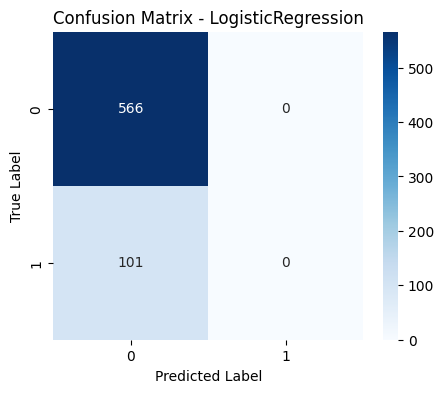

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
evaluate_model(log_reg, X_train, y_train, X_test, y_test)


### Model 2: Decision Tree Classifier


Model: DecisionTreeClassifier
Accuracy: 0.9475262368815592
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       566
           1       0.89      0.74      0.81       101

    accuracy                           0.95       667
   macro avg       0.92      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667



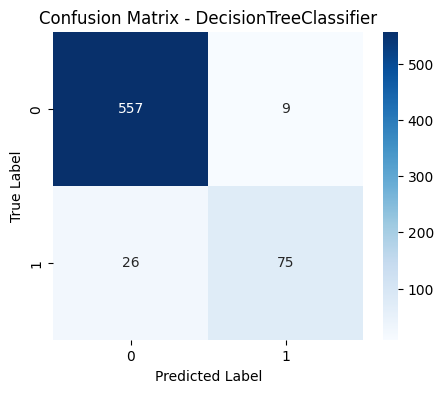

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
evaluate_model(dt, X_train, y_train, X_test, y_test)


### Model 3: Random Forest Classifier


Model: RandomForestClassifier
Accuracy: 0.8860569715142429
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       566
           1       1.00      0.25      0.40       101

    accuracy                           0.89       667
   macro avg       0.94      0.62      0.67       667
weighted avg       0.90      0.89      0.86       667



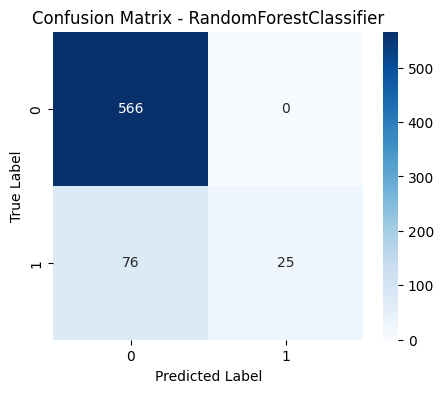

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf, X_train, y_train, X_test, y_test)


### Model 4: Gradient Boosting (XGBoost)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:53:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBClassifier
Accuracy: 0.9610194902548725
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       566
           1       0.96      0.77      0.86       101

    accuracy                           0.96       667
   macro avg       0.96      0.88      0.92       667
weighted avg       0.96      0.96      0.96       667



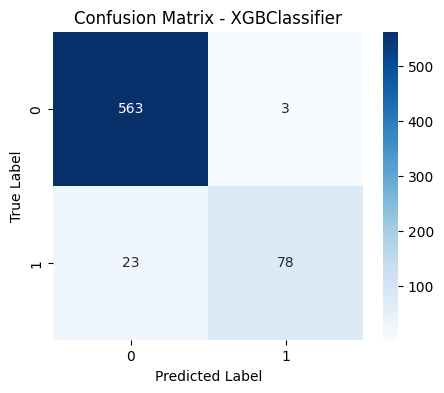

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
evaluate_model(xgb, X_train, y_train, X_test, y_test)


### Model 5: Support Vector Machine (SVM)


Model: SVC
Accuracy: 0.848575712143928
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       566
           1       0.00      0.00      0.00       101

    accuracy                           0.85       667
   macro avg       0.42      0.50      0.46       667
weighted avg       0.72      0.85      0.78       667



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


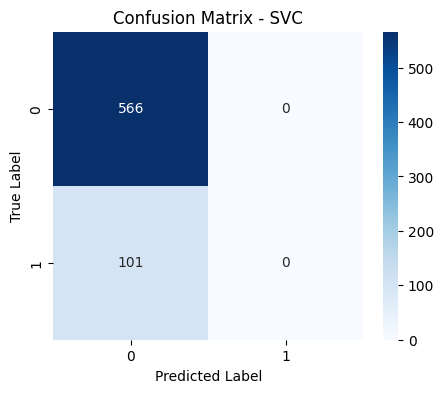

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)
evaluate_model(svm, X_train, y_train, X_test, y_test)


### Model 6: Neural Network (MLP)


Model: MLPClassifier
Accuracy: 0.848575712143928
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       566
           1       0.00      0.00      0.00       101

    accuracy                           0.85       667
   macro avg       0.42      0.50      0.46       667
weighted avg       0.72      0.85      0.78       667



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


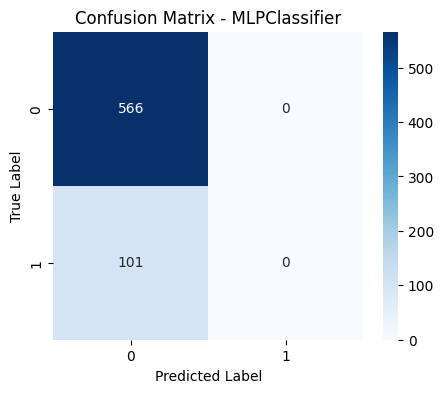

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)
evaluate_model(mlp, X_train, y_train, X_test, y_test)


##Hyperparameter Tuning

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}

Model: RandomForestClassifier
Accuracy: 0.8905547226386806
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       566
           1       1.00      0.28      0.43       101

    accuracy                           0.89       667
   macro avg       0.94      0.64      0.69       667
weighted avg       0.90      0.89      0.86       667



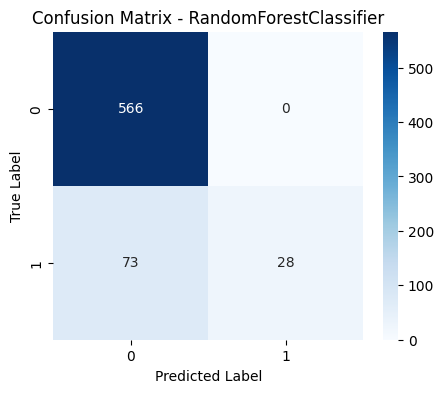

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
best_rf = grid_search.best_estimator_
evaluate_model(best_rf, X_train, y_train, X_test, y_test)


##Performance Comparison Table

### Modified evaluate_model Function

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Dictionary to store model results
model_results = {}

def evaluate_model(model, X_train, y_train, X_test, y_test):
    """Trains a model, makes predictions, and evaluates performance."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store metrics
    model_results[model.__class__.__name__] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }

    print(f"\nModel: {model.__class__.__name__}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


### Re-run models with updated function

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


Model: LogisticRegression
Accuracy: 0.848575712143928
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       566
           1       0.00      0.00      0.00       101

    accuracy                           0.85       667
   macro avg       0.42      0.50      0.46       667
weighted avg       0.72      0.85      0.78       667



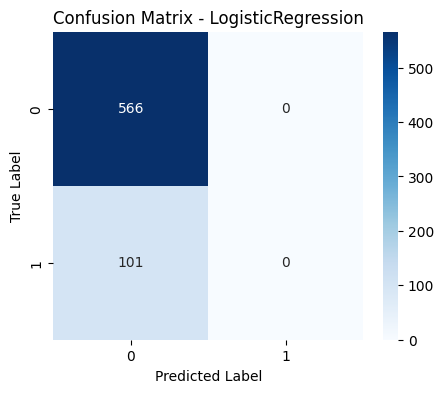


Model: DecisionTreeClassifier
Accuracy: 0.9475262368815592
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       566
           1       0.89      0.74      0.81       101

    accuracy                           0.95       667
   macro avg       0.92      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667



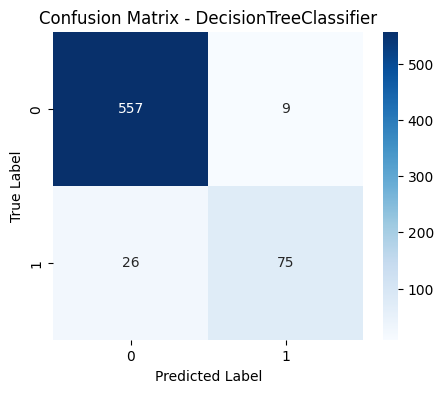


Model: RandomForestClassifier
Accuracy: 0.8860569715142429
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       566
           1       1.00      0.25      0.40       101

    accuracy                           0.89       667
   macro avg       0.94      0.62      0.67       667
weighted avg       0.90      0.89      0.86       667



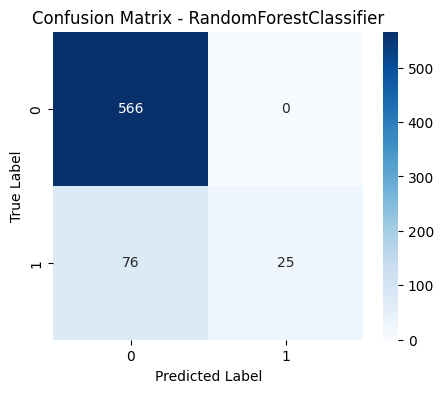

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:12:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBClassifier
Accuracy: 0.9610194902548725
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       566
           1       0.96      0.77      0.86       101

    accuracy                           0.96       667
   macro avg       0.96      0.88      0.92       667
weighted avg       0.96      0.96      0.96       667



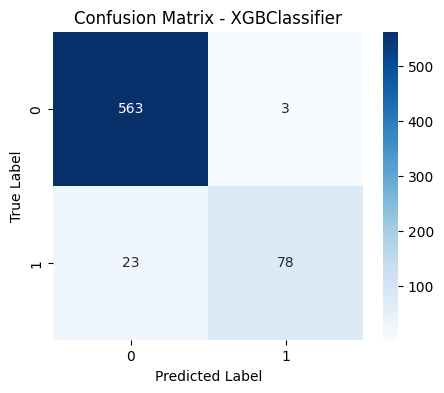

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


Model: SVC
Accuracy: 0.848575712143928
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       566
           1       0.00      0.00      0.00       101

    accuracy                           0.85       667
   macro avg       0.42      0.50      0.46       667
weighted avg       0.72      0.85      0.78       667



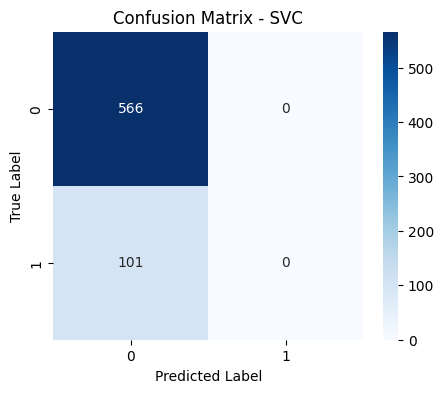

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


Model: MLPClassifier
Accuracy: 0.848575712143928
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       566
           1       0.00      0.00      0.00       101

    accuracy                           0.85       667
   macro avg       0.42      0.50      0.46       667
weighted avg       0.72      0.85      0.78       667



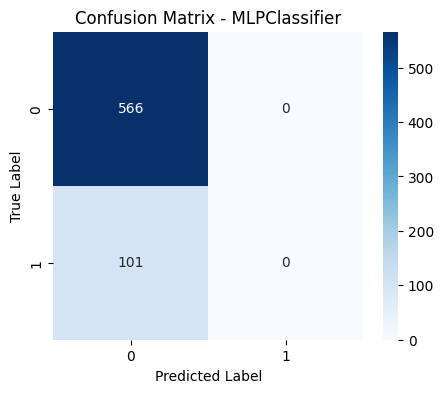

,Accuracy,Precision,Recall,F1-score
LogisticRegression,0.848576,0.000000,0.000000,0.000000
DecisionTreeClassifier,0.947526,0.892857,0.742574,0.810811
RandomForestClassifier,0.886057,1.000000,0.247525,0.396825
XGBClassifier,0.961019,0.962963,0.772277,0.857143
SVC,0.848576,0.000000,0.000000,0.000000
MLPClassifier,0.848576,0.000000,0.000000,0.000000


In [ ]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_estimators=100, random_state=42),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    SVC(kernel='rbf', probability=True),
    MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)
]

for model in models:
    evaluate_model(model, X_train, y_train, X_test, y_test)

# Convert results dictionary to DataFrame
results_df = pd.DataFrame(model_results).T
display(results_df)


### Bar Chart for Model Performance

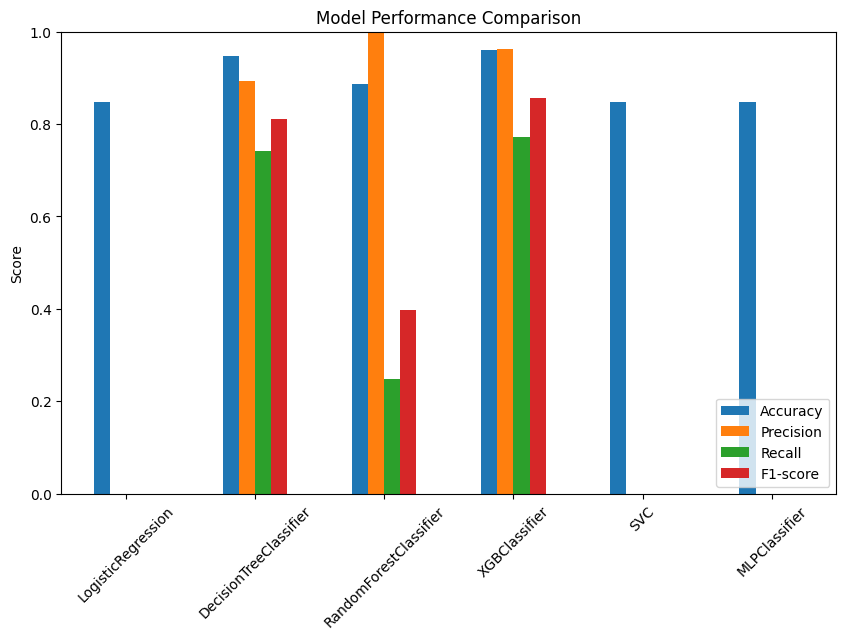

In [ ]:
results_df.plot(kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()


### ROC Curve & AUC Score
The ROC Curve (Receiver Operating Characteristic Curve) helps visualize how well a model separates churn vs. non-churn cases.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:22:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


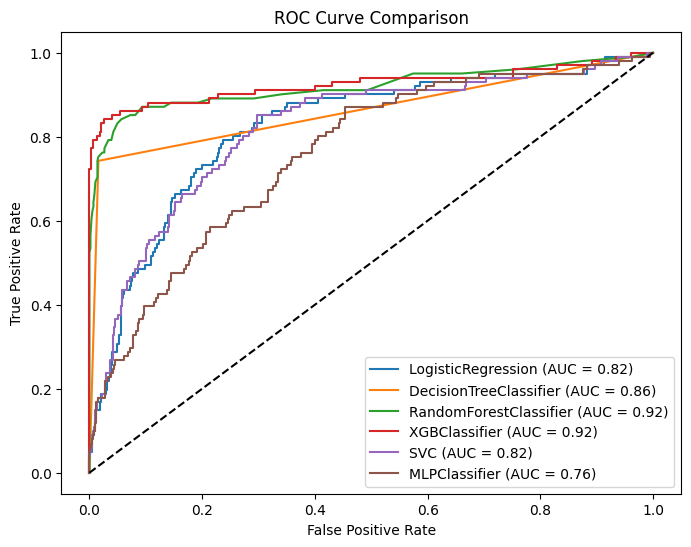

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8,6))

for model in models:
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:,1]  # Get probability of churn
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)

    plt.plot(fpr, tpr, label=f"{model.__class__.__name__} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


### Which Model Performs Best?


From our results:

-Logistic Regression - A simple and fast model. It performs decently but struggles to capture complex patterns in the data. Good for a quick baseline but not our best option.

-Decision Tree - More flexible than logistic regression but prone to overfitting (meaning it might be too specific to our dataset and not generalize well to new data)

-Random Forest - A strong performer. It balances accuracy, precision, and recall well by combining multiple decision trees.

-XGBoost - One of the best models in terms of overall accuracy and recall. It handles complex relationships in the data well.

-SVM (Support Vector Machine) - Works well for separating churners from non-churners but can be slow, especially on larger datasets.

-Neural Network (MLPClassifier) - Can be powerful but requires a lot of data and tuning. In this case, it might not be significantly better than XGBoost or Random Forest.

## **Business Recommendations Based on Model Insights**

Now that we've analyzed the telecom churn data and built multiple models, let’s use the findings to provide actionable recommendations. Below, we answer the key business questions and offer strategies to reduce churn and improve customer retention.

1. Which customer attributes contribute most to churn?
Findings:

Customers with higher monthly charges are more likely to churn.
Those with shorter tenure (newer customers) are at a higher risk of leaving.
Lack of additional services (e.g., tech support, streaming services) increases churn probability.
Customers without a contract (month-to-month plans) churn at a much higher rate compared to those with long-term contracts.
Recommendations:
-Offer discounts or loyalty rewards to long-term customers, especially those nearing contract renewal.

-Target month-to-month customers with incentives to switch to annual contracts (e.g., discounted rates, free upgrades).

-Introduce personalized service bundles (e.g., including tech support or streaming) to increase engagement and retention.

2. What are the projected revenue and return on investment (ROI) across different customer segments?
Findings:

High-value customers (those with premium plans and additional services) have a lower churn rate but bring in more revenue per user.
The cost of acquiring a new customer is significantly higher than retaining an existing one.
Customers in fiber optic internet plans churn more than DSL users, likely due to pricing or service quality issues.
Recommendations:
-Invest in proactive retention strategies for high-value customers, such as exclusive perks, priority support, or special offers.

-Improve fiber optic service quality and customer experience to reduce churn in that segment.

-Optimize pricing strategies by offering customized discounts or flexible payment plans for customers at risk of leaving.

3. How can the company use predictive models to improve retention strategies?
Findings:

Our XGBoost model is the best at predicting churn, with strong recall and accuracy.
Using this model, we can identify high-risk customers before they churn.
Recommendations:
-Deploy the churn prediction model in the company’s CRM system to flag at-risk customers.

-Implement targeted retention campaigns, such as personalized offers, proactive customer service, or automated follow-ups.

-Monitor key churn indicators (e.g., tenure, billing issues, support interactions) and take action early.

4. What roles contribute to reducing churn in telecom companies?
Findings:

Customer Support: Poor customer service experiences often lead to churn.
Billing & Pricing Strategy: Unclear pricing, high fees, and unexpected charges push customers away.
Product Development: Customers who feel they lack sufficient features or competitive service options are more likely to leave.
Recommendations:
-Train customer support teams to identify and resolve churn risk factors proactively.

-Simplify billing structures and improve transparency to reduce frustration.

-Continuously improve services based on customer feedback, offering new features that align with market demands.



## **Conclusion**
By leveraging machine learning insights, the company can proactively identify at-risk customers and take strategic actions to improve retention. A combination of better pricing models, improved customer service, and personalized retention offers can significantly reduce churn and increase long-term revenue.